## Importing the rquired libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## loading the dataset

In [2]:
housing_data = pd.read_csv('housing.csv')
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Data exploration

In [3]:
housing_data.shape

(20640, 10)

In [4]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


from the stats above we can say that we have a lot of outlier; we need to take care of those outliers because in regression problem. An outlier can affect the accracy of the model.

In [14]:
housing_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [15]:
## missing bedrooms 

missing_bed_rooms = round(housing_data['total_bedrooms'].isnull().sum()/len(housing_data),2)*100
missing_bed_rooms

1.0

In [16]:
## only 1% of bedroom values are missing, we can drop those data records

housing_data.dropna(subset = ['total_bedrooms'], inplace = True)

In [17]:
housing_data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [18]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [19]:
housing_data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [21]:
ohe = OneHotEncoder(sparse_output = False, handle_unknown='ignore',drop='first' )

In [22]:
ocean_proximity = ohe.fit_transform(housing_data[['ocean_proximity']])

In [23]:
ocean_proximity

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [24]:
type(ocean_proximity)

numpy.ndarray

In [25]:
ohe.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [26]:
housing_data.drop(columns='ocean_proximity', axis = 1, inplace = True )

In [27]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


## now we need to concat ocean_proximity with the housing_data

* first we need to convert the ndarry to dataframe then we can concat two data

In [28]:
ocean_proximity_df = pd.DataFrame(ocean_proximity, columns=['INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'])

In [29]:
## now we can concat two dataframes

df = pd.concat([housing_data, ocean_proximity_df], axis = 1)

In [30]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,1.0,0.0


In [31]:
df.shape

(20638, 13)

In [32]:
df.dropna(inplace= True)

In [33]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

In [34]:
df.shape

(20228, 13)

In [35]:
y = df['median_house_value']
X = df.drop(columns=['median_house_value'], axis = 1)

In [36]:
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [37]:
y.shape

(20228,)

In [38]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0.0,0.0,1.0,0.0


In [39]:
X.shape

(20228, 12)

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state= 42)

In [42]:
scaler = StandardScaler()

In [43]:
scaler.fit_transform(X_train)

array([[-0.51839772, -0.26693674, -1.24536811, ..., -0.01188583,
        -0.35541875,  2.62199561],
       [ 0.63433894, -0.76971865,  1.21930795, ..., -0.01188583,
        -0.35541875, -0.38138889],
       [ 0.79402541, -0.92948112, -0.529817  , ..., -0.01188583,
        -0.35541875,  2.62199561],
       ...,
       [ 0.57445652, -0.76032085,  1.06029659, ..., -0.01188583,
        -0.35541875, -0.38138889],
       [-1.23199661,  0.91248624, -1.32487379, ..., -0.01188583,
         2.81358257, -0.38138889],
       [-1.42661448,  0.98766858,  1.85535338, ..., -0.01188583,
        -0.35541875,  2.62199561]])

In [44]:
scaler.transform(X_test)

array([[ 1.24314359, -1.17852263,  1.13980227, ..., -0.01188583,
         2.81358257, -0.38138889],
       [ 1.29803581, -0.88249216, -0.529817  , ..., -0.01188583,
        -0.35541875, -0.38138889],
       [ 1.14333955, -0.572365  , -1.16586243, ..., -0.01188583,
        -0.35541875, -0.38138889],
       ...,
       [-0.43855449, -0.36091466, -0.45031132, ..., -0.01188583,
        -0.35541875, -0.38138889],
       [-1.31683004,  0.85140059,  0.50375683, ..., -0.01188583,
        -0.35541875,  2.62199561],
       [-1.33679085,  1.04405534,  1.85535338, ..., -0.01188583,
         2.81358257, -0.38138889]])

In [45]:
lr = LinearRegression()

In [46]:
lr.fit(X_train, y_train)

LinearRegression()

In [47]:
y_pred = lr.predict(X_test)

In [48]:
mse = mean_squared_error(y_test, y_pred)
print(mse)

4707734261.164352


In [49]:
rmse = np.sqrt(mse)
print(rmse)

68612.93071400137


In [50]:
mae = mean_absolute_error(y_test, y_pred)
print(mae)

50373.864082086184


In [51]:
from sklearn import tree

In [52]:
regTree = tree.DecisionTreeRegressor(max_depth=4)

In [53]:
regTree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [54]:
y_pred_tree = regTree.predict(X_test)

In [55]:
mse = mean_squared_error(y_test, y_pred_tree)

In [56]:
mse

6012942962.648341

In [58]:
dot_data = tree.export_graphviz(regTree, out_file=None)

In [59]:
from IPython.display import Image

In [60]:
import pydotplus

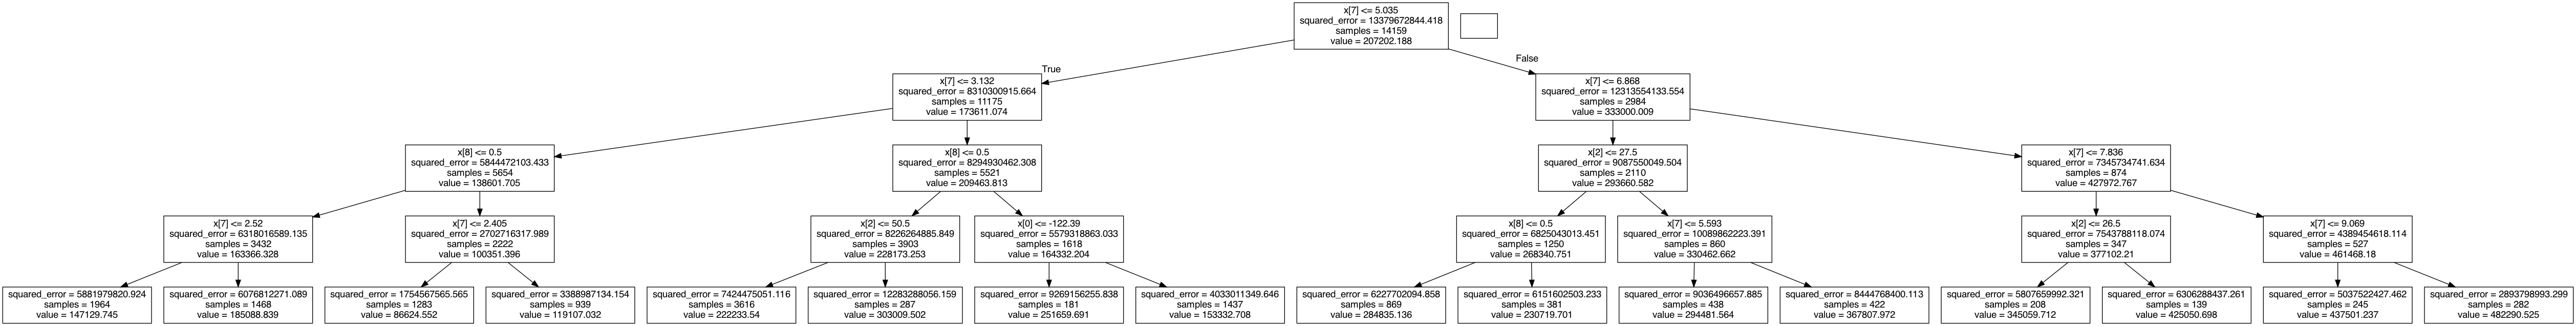

In [80]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
